In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
titanic = pd.read_csv('train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


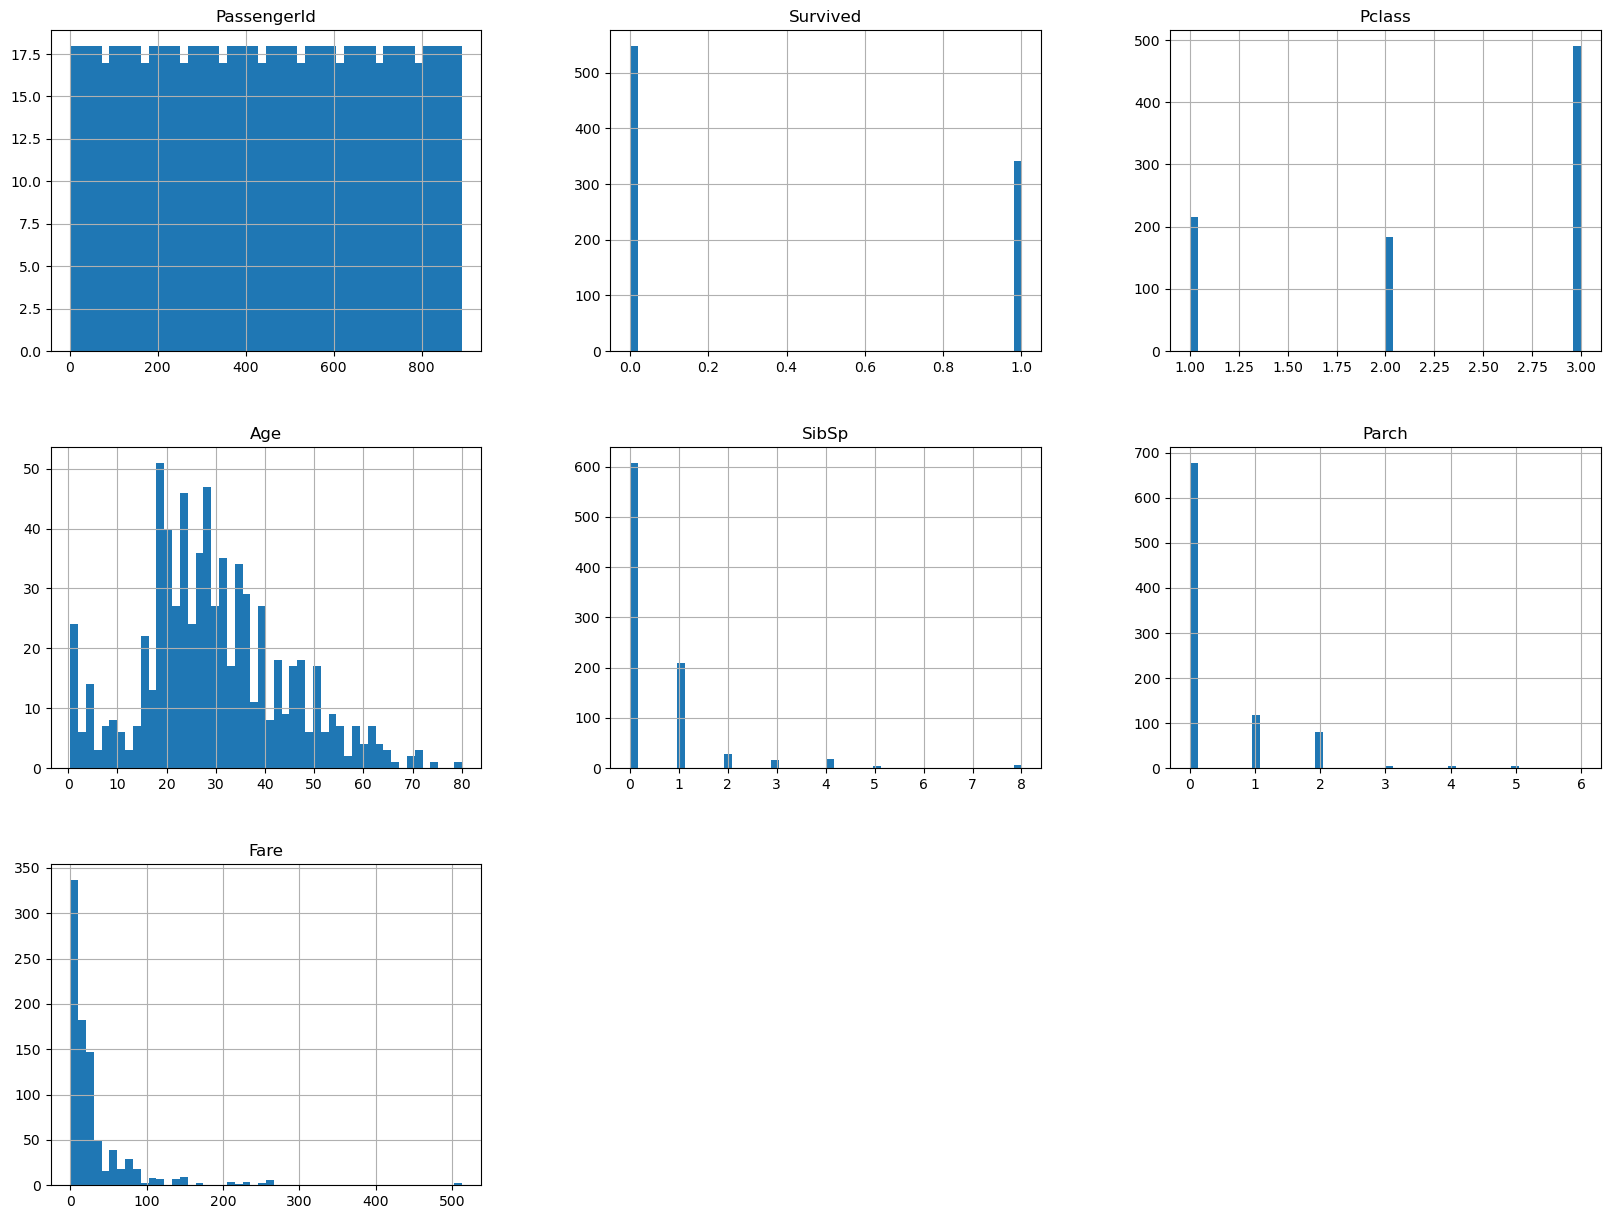

In [5]:
titanic.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
def impute_age(cols):
    Age = cols[0] 
    Pclass = cols[1] 
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37            
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [9]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age, axis=1)

In [10]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [11]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [12]:
titanic['Privileged'] = ''

In [13]:
titanic.loc[titanic['Name'].str.contains('Rev.|Major.|Dr.| the |Capt.|Col.|Mlle.|Mme.|Don.|Jonkheer.')==True, ['Privileged']] = 1

In [14]:
titanic['Privileged'] = titanic['Privileged'].apply(lambda x: x if x==1 else 0)

In [15]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Privileged
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [16]:
titanic["RelativesOnboard"] = titanic["SibSp"] + titanic["Parch"]

In [17]:
titanic['CabinSign'] = titanic['Cabin'].astype(str).str[0]

In [18]:
titanic.drop(columns=['SibSp', 'Parch', 'Cabin'], inplace=True)

In [19]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Privileged,RelativesOnboard,CabinSign
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0,1,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,0,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,0,n
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,S,1,0,n
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,S,0,0,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,W./C. 6607,23.4500,S,0,3,n
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C,0,0,C


# Train and test set

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [22]:
X = titanic.drop(['Survived','Ticket','PassengerId','Name'],axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [23]:
X_train

,Pclass,Sex,Age,Fare,Embarked,Privileged,RelativesOnboard,CabinSign
520,1,female,30.0,93.5000,S,0,0,B
510,3,male,29.0,7.7500,Q,0,0,n
446,2,female,13.0,19.5000,S,0,1,n
2,3,female,26.0,7.9250,S,0,0,n
691,3,female,4.0,13.4167,C,0,1,n
...,...,...,...,...,...,...,...,...
575,3,male,19.0,14.5000,S,0,0,n
838,3,male,32.0,56.4958,S,0,0,n
337,1,female,41.0,134.5000,C,0,0,E
523,1,female,44.0,57.9792,C,0,1,B


In [24]:
titanic_num = X_train.drop(columns=['Sex', 'Embarked', 'CabinSign'])
titanic_cat = X_train[['Sex', 'Embarked','CabinSign']]

In [25]:
num_attribs = list(titanic_num)
cat_attribs = list(titanic_cat)

In [26]:
num_pipeline = Pipeline([
    ('imputer',  SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

In [27]:
cat_pipeline = Pipeline([
    ('one_hot_encoder', OneHotEncoder())
])

In [28]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

In [29]:
X_train_prepared = full_pipeline.fit_transform(X_train)

In [30]:
X_test_prepared = full_pipeline.transform(X_test)

In [31]:
len(X_train_prepared[0])

19

# Random Forest

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
from sklearn.model_selection import GridSearchCV

In [35]:
rfc =  RandomForestClassifier()

In [36]:
score = cross_val_score(rfc, X_train_prepared, y_train, cv=3, verbose=3)
score.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] END ................................ score: (test=0.841) total time=   0.0s
[CV] END ................................ score: (test=0.760) total time=   0.0s
[CV] END ................................ score: (test=0.802) total time=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished


0.8009646352037656

In [40]:
param_grid = [
    {'n_estimators': [200, 400, 600, 800], 'random_state': [None, 1, 2] },
    #'n_estimators':[750, 850, 950, 1050, 2050], 'max_features':[6, 8]},
]

forest_clf =  RandomForestClassifier()

grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(X_train_prepared, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'n_estimators': [200, 400, 600, 800],
                          'random_state': [None, 1, 2]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [41]:
grid_search.best_estimator_

RandomForestClassifier(n_estimators=800, random_state=2)

In [42]:
rfc = grid_search.best_estimator_

In [43]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.44430445824108405 {'n_estimators': 200, 'random_state': None}
0.4388254116792735 {'n_estimators': 200, 'random_state': 1}
0.44250022781113146 {'n_estimators': 200, 'random_state': 2}
0.4424710670329647 {'n_estimators': 400, 'random_state': None}
0.4442899373011916 {'n_estimators': 400, 'random_state': 1}
0.43333664184014065 {'n_estimators': 400, 'random_state': 2}
0.44790551999133665 {'n_estimators': 600, 'random_state': None}
0.4442899373011916 {'n_estimators': 600, 'random_state': 1}
0.433321753360576 {'n_estimators': 600, 'random_state': 2}
0.4442899373011916 {'n_estimators': 800, 'random_state': None}
0.4406739706257867 {'n_estimators': 800, 'random_state': 1}
0.4314865527004177 {'n_estimators': 800, 'random_state': 2}


In [44]:
rfc.fit(X_train_prepared, y_train)

RandomForestClassifier(n_estimators=800, random_state=2)

In [45]:
rfc_predictions = rfc.predict(X_test_prepared)

In [46]:
print(classification_report(y_test,rfc_predictions))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       154
           1       0.82      0.70      0.76       114

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



# KNeighbors Classifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
param_grid = [{'n_neighbors': [5, 10, 20, 30]}]

kn_clf =  KNeighborsClassifier()

grid_search = GridSearchCV(kn_clf, param_grid, cv=20, verbose=142)

grid_search.fit(X_train_prepared, y_train)

Fitting 20 folds for each of 4 candidates, totalling 80 fits
[CV 1/20; 1/4] START n_neighbors=5..............................................
[CV 1/20; 1/4] END ...............n_neighbors=5;, score=0.844 total time=   0.0s
[CV 2/20; 1/4] START n_neighbors=5..............................................
[CV 2/20; 1/4] END ...............n_neighbors=5;, score=0.750 total time=   0.0s
[CV 3/20; 1/4] START n_neighbors=5..............................................
[CV 3/20; 1/4] END ...............n_neighbors=5;, score=0.750 total time=   0.0s
[CV 4/20; 1/4] START n_neighbors=5..............................................
[CV 4/20; 1/4] END ...............n_neighbors=5;, score=0.806 total time=   0.0s
[CV 5/20; 1/4] START n_neighbors=5..............................................
[CV 5/20; 1/4] END ...............n_neighbors=5;, score=0.871 total time=   0.0s
[CV 6/20; 1/4] START n_neighbors=5..............................................
[CV 6/20; 1/4] END ...............n_neighbors=5;

C:\Users\magda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\magda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 4/20; 4/4] END ..............n_neighbors=30;, score=0.774 total time=   0.0s
[CV 5/20; 4/4] START n_neighbors=30.............................................
[CV 5/20; 4/4] END ..............n_neighbors=30;, score=0.839 total time=   0.0s
[CV 6/20; 4/4] START n_neighbors=30.............................................
[CV 6/20; 4/4] END ..............n_neighbors=30;, score=0.645 total time=   0.0s
[CV 7/20; 4/4] START n_neighbors=30.............................................
[CV 7/20; 4/4] END ..............n_neighbors=30;, score=0.774 total time=   0.0s
[CV 8/20; 4/4] START n_neighbors=30.............................................
[CV 8/20; 4/4] END ..............n_neighbors=30;, score=0.903 total time=   0.0s
[CV 9/20; 4/4] START n_neighbors=30.............................................
[CV 9/20; 4/4] END ..............n_neighbors=30;, score=0.742 total time=   0.0s
[CV 10/20; 4/4] START n_neighbors=30............................................
[CV 10/20; 4/4] END ........

C:\Users\magda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\magda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(cv=20, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [5, 10, 20, 30]}], verbose=142)

In [49]:
grid_search.best_estimator_

KNeighborsClassifier()

In [50]:
knc = grid_search.best_estimator_

In [51]:
knc_predictions = knc.predict(X_test_prepared)

C:\Users\magda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [52]:
print(classification_report(y_test,knc_predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.81      0.66      0.72       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



# Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dtree = DecisionTreeClassifier()

In [55]:
param_grid = [{'criterion' : ["gini", "entropy"], 'splitter' : ["best", "random"], 'random_state': [None, 1, 2, 3] }]

dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(dtree, param_grid, cv=5, verbose=3)

grid_search.fit(X_train_prepared, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END criterion=gini, random_state=None, splitter=best;, score=0.712 total time=   0.0s
[CV 2/5] END criterion=gini, random_state=None, splitter=best;, score=0.768 total time=   0.0s
[CV 3/5] END criterion=gini, random_state=None, splitter=best;, score=0.704 total time=   0.0s
[CV 4/5] END criterion=gini, random_state=None, splitter=best;, score=0.790 total time=   0.0s
[CV 5/5] END criterion=gini, random_state=None, splitter=best;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=gini, random_state=None, splitter=random;, score=0.728 total time=   0.0s
[CV 2/5] END criterion=gini, random_state=None, splitter=random;, score=0.792 total time=   0.0s
[CV 3/5] END criterion=gini, random_state=None, splitter=random;, score=0.728 total time=   0.0s
[CV 4/5] END criterion=gini, random_state=None, splitter=random;, score=0.823 total time=   0.0s
[CV 5/5] END criterion=gini, random_state=None, splitter=random;, score=0.79

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'random_state': [None, 1, 2, 3],
                          'splitter': ['best', 'random']}],
             verbose=3)

In [56]:
dtree = grid_search.best_estimator_

In [57]:
dtree_predictions = dtree.predict(X_test_prepared)

In [58]:
print(classification_report(y_test,dtree_predictions))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       154
           1       0.75      0.69      0.72       114

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



# GradientBoostingClassifier

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
param_grid = [{'loss' : ['deviance', 'exponential'], 'n_estimators' : [100, 500], 'learning_rate': [0.005, 0.01, 0.05 ], 'random_state': [None, 1, 2] }]

gbclf = GradientBoostingClassifier()

grid_search = GridSearchCV(gbclf, param_grid, cv=5, verbose=3)

grid_search.fit(X_train_prepared, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END learning_rate=0.005, loss=deviance, n_estimators=100, random_state=None;, score=0.800 total time=   0.0s
[CV 2/5] END learning_rate=0.005, loss=deviance, n_estimators=100, random_state=None;, score=0.800 total time=   0.0s
[CV 3/5] END learning_rate=0.005, loss=deviance, n_estimators=100, random_state=None;, score=0.760 total time=   0.0s
[CV 4/5] END learning_rate=0.005, loss=deviance, n_estimators=100, random_state=None;, score=0.790 total time=   0.0s
[CV 5/5] END learning_rate=0.005, loss=deviance, n_estimators=100, random_state=None;, score=0.839 total time=   0.0s
[CV 1/5] END learning_rate=0.005, loss=deviance, n_estimators=100, random_state=1;, score=0.800 total time=   0.0s
[CV 2/5] END learning_rate=0.005, loss=deviance, n_estimators=100, random_state=1;, score=0.800 total time=   0.0s
[CV 3/5] END learning_rate=0.005, loss=deviance, n_estimators=100, random_state=1;, score=0.760 total time=   0.0s
[CV

[CV 2/5] END learning_rate=0.01, loss=deviance, n_estimators=100, random_state=2;, score=0.848 total time=   0.0s
[CV 3/5] END learning_rate=0.01, loss=deviance, n_estimators=100, random_state=2;, score=0.760 total time=   0.0s
[CV 4/5] END learning_rate=0.01, loss=deviance, n_estimators=100, random_state=2;, score=0.839 total time=   0.0s
[CV 5/5] END learning_rate=0.01, loss=deviance, n_estimators=100, random_state=2;, score=0.847 total time=   0.0s
[CV 1/5] END learning_rate=0.01, loss=deviance, n_estimators=500, random_state=None;, score=0.840 total time=   0.2s
[CV 2/5] END learning_rate=0.01, loss=deviance, n_estimators=500, random_state=None;, score=0.856 total time=   0.2s
[CV 3/5] END learning_rate=0.01, loss=deviance, n_estimators=500, random_state=None;, score=0.776 total time=   0.2s
[CV 4/5] END learning_rate=0.01, loss=deviance, n_estimators=500, random_state=None;, score=0.871 total time=   0.2s
[CV 5/5] END learning_rate=0.01, loss=deviance, n_estimators=500, random_sta

[CV 3/5] END learning_rate=0.05, loss=deviance, n_estimators=500, random_state=1;, score=0.784 total time=   0.2s
[CV 4/5] END learning_rate=0.05, loss=deviance, n_estimators=500, random_state=1;, score=0.831 total time=   0.2s
[CV 5/5] END learning_rate=0.05, loss=deviance, n_estimators=500, random_state=1;, score=0.815 total time=   0.2s
[CV 1/5] END learning_rate=0.05, loss=deviance, n_estimators=500, random_state=2;, score=0.824 total time=   0.2s
[CV 2/5] END learning_rate=0.05, loss=deviance, n_estimators=500, random_state=2;, score=0.832 total time=   0.2s
[CV 3/5] END learning_rate=0.05, loss=deviance, n_estimators=500, random_state=2;, score=0.784 total time=   0.2s
[CV 4/5] END learning_rate=0.05, loss=deviance, n_estimators=500, random_state=2;, score=0.831 total time=   0.2s
[CV 5/5] END learning_rate=0.05, loss=deviance, n_estimators=500, random_state=2;, score=0.815 total time=   0.2s
[CV 1/5] END learning_rate=0.05, loss=exponential, n_estimators=100, random_state=None;,

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid=[{'learning_rate': [0.005, 0.01, 0.05],
                          'loss': ['deviance', 'exponential'],
                          'n_estimators': [100, 500],
                          'random_state': [None, 1, 2]}],
             verbose=3)

In [61]:
grid_search.best_estimator_

GradientBoostingClassifier(learning_rate=0.01)

In [62]:
gbclf = grid_search.best_estimator_

In [63]:
gbclf_predictions = gbclf.predict(X_test_prepared)

In [64]:
print(classification_report(y_test, gbclf_predictions))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       154
           1       0.92      0.58      0.71       114

    accuracy                           0.80       268
   macro avg       0.84      0.77      0.78       268
weighted avg       0.82      0.80      0.79       268



# Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
param_grid = [{'random_state': [1, 42] }]

lgr = LogisticRegression()

grid_search = GridSearchCV(lgr, param_grid, cv=5, verbose=3)

grid_search.fit(X_train_prepared, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ....................random_state=1;, score=0.808 total time=   0.0s
[CV 2/5] END ....................random_state=1;, score=0.832 total time=   0.0s
[CV 3/5] END ....................random_state=1;, score=0.736 total time=   0.0s
[CV 4/5] END ....................random_state=1;, score=0.871 total time=   0.0s
[CV 5/5] END ....................random_state=1;, score=0.782 total time=   0.0s
[CV 1/5] END ...................random_state=42;, score=0.808 total time=   0.0s
[CV 2/5] END ...................random_state=42;, score=0.832 total time=   0.0s
[CV 3/5] END ...................random_state=42;, score=0.736 total time=   0.0s
[CV 4/5] END ...................random_state=42;, score=0.871 total time=   0.0s
[CV 5/5] END ...................random_state=42;, score=0.782 total time=   0.0s


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'random_state': [1, 42]}], verbose=3)

In [67]:
grid_search.best_estimator_

LogisticRegression(random_state=1)

In [68]:
lgr = grid_search.best_estimator_

In [69]:
lgr_predictions = lgr.predict(X_test_prepared)

In [70]:
print(classification_report(y_test, lgr_predictions))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       154
           1       0.82      0.68      0.74       114

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.80      0.79       268



# Comparing classifiers

In [71]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

In [72]:
X_test = X_test_prepared.copy()

In [73]:
# calculate probabilities
rfc_prob = rfc.predict_proba(X_test)[:, 1]
knc_prob = knc.predict_proba(X_test)[:, 1]
dtree_prob = dtree.predict_proba(X_test)[:, 1]
gbclf_prob = gbclf.predict_proba(X_test)[:, 1]
lgr_prob = lgr.predict_proba(X_test)[:, 1]

In [74]:
# calculate the ROC curve data for each classifier
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_prob)
knc_fpr, knc_tpr, _ = roc_curve(y_test, knc_prob)
dtree_fpr, dtree_tpr, _ = roc_curve(y_test, dtree_prob)
gbclf_fpr, gbclf_tpr, _ = roc_curve(y_test, gbclf_prob)
lgr_fpr, lgr_tpr, _ = roc_curve(y_test, lgr_prob)

In [75]:
# calculate the AUC scores for each classifier
rfc_auc = auc(rfc_fpr, rfc_tpr)
knc_auc = auc(knc_fpr, knc_tpr)
dtree_auc = auc(dtree_fpr, dtree_tpr)
gbclf_auc = auc(gbclf_fpr, gbclf_tpr)
lgr_auc = auc(lgr_fpr, lgr_tpr)

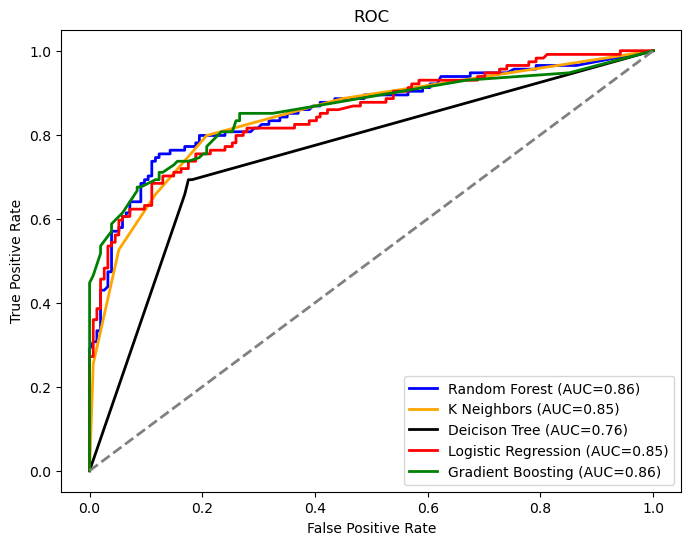

In [76]:
# create the plot
plt.figure(figsize=(8, 6))
plt.plot(rfc_fpr, rfc_tpr, color='blue', lw=2, label=f'Random Forest (AUC={rfc_auc:.2f})')
plt.plot(knc_fpr, knc_tpr, color='orange', lw=2, label=f'K Neighbors (AUC={knc_auc:.2f})')
plt.plot(dtree_fpr, dtree_tpr, color='black', lw=2, label=f'Deicison Tree (AUC={dtree_auc:.2f})')
plt.plot(lgr_fpr, lgr_tpr, color='red', lw=2, label=f'Logistic Regression (AUC={lgr_auc:.2f})')
plt.plot(gbclf_fpr, gbclf_tpr, color='green', lw=2, label=f'Gradient Boosting (AUC={gbclf_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')

# show the plot
plt.show()